<font size=5>Car prices - 1</font></h1>

<h1>On fait le ménage</h1>

<h2>Objectif ?</h2>

Le pré-process des données ou Data Wrangling consiste à convertir le jeu de données de son format d'origine à une forme plus propice à l'analyse .

<h4>Import pandas</h4> 

In [12]:
import pandas as pd
import matplotlib.pylab as plt

<h2>Chargement des données.</h2>

In [14]:
df=pd.read_csv("imports-85.data")
df.columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors' , 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


<b>Le ménage peut commencer !</b>

Etapes : :
<ol>
    <li>dentifier les valeurs manquantes</li>
    <li>traiter les valeurs manquantes</li>
    <li>corriger les formats de données</li>
</ol>

<h2>Identication des valeurs manquantes</h2>


<h4>Convertion des  "?" en NaN</h4>
Le jeu de données contient de nombreuses valeurs marquées "?". Il faut les remplacer par NaN qui correspond au marqueur par défaut des valeurs manquantes (Not a Number)
On utilise alors la fonction replace : 
 <pre>.replace(A, B, inplace = True) </pre>
pour replacer A par B

In [15]:
import numpy as np

# remplacer "?" par NaN
df.replace("?", np.nan, inplace = True) #si on met juste NaN ça sera une chaine de caractère qui ne sera pas considéré en NaN lors d'un filllna
df.head(5) #on transforme tout en NaN pour pouvoir travailler plus facilement dessus par la suite

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


<h4>Compter les valeurs manquantes par colonne</h4>

Deux fonctions natives permettent d'identifier un Nan : 
<ol>
    <li><b>.isnull()</b></li>
    <li><b>.notnull()</b></li>
</ol>
Elles retournent chacune un booléen selon le test effectué. Le booléen est assimilé à la veur 1 lors de l'addition. Une astuce consiste alors à sommer sur le DataFrame en lui appliquant la fonction isnull().<br>
Il suffit ensuite d'ultiliser un slicing pour n'afficher que les colonnes contenqnt des valeurs nulles.

In [16]:
df.isnull().sum()[df.isnull().sum()>0]

normalized-losses    40
num-of-doors          2
bore                  4
stroke                4
horsepower            2
peak-rpm              2
price                 4
dtype: int64

In [17]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

<h3>Traiter les valeurs manquantes</h3>

<ol>
    <li>drop<br>
        a. Supprimer une ligne<br>
        b. Supprimer une colonne
    </li>
    <li>fill ou replace<br>
        a. remplacer par la moyenne<br>
        b. remplacer par le mode<br> #mode c'est la valeur la plus fréquente
        c. remplacr en utilisant des fonctions spécifiques ou personnalisées
    </li>
</ol>

Les colonnes ne sont supprimées que si la majeur parties ds valeurs sont nulles.<br>
Selon la nature de la colonne et ce qu'elle représente une méthode sera préférable à une autre : 

<b>Remplacer par la moyenne:</b><br>
Cela concernera les colonnes numériques (ou sensées l'être) : "normalized-losses", "stroke", "bore", "horsepower" et "peak-rpm"

<b>Remplacer par le mode:</b><br>
"num-of-doors": est une catégorie. on la remplacera par la valeur la plus fréquente qu'on appelle "mode"

<b>Supprimer des lignes:</b><br>
4 lignes ne contiennet pas de valeur cible : "price". Elles ne peuvent donc pas servir à la prédiction et peuvent être supprimées.

<h4>Remplacement par la moyenne </h4>

In [18]:
# Extraction des colonnes à corriger par la moyenne :
col_a_corr = df[["normalized-losses","stroke","bore","horsepower","peak-rpm"]].astype("float")
#Correction
col_corrigees = col_a_corr.apply(lambda x: x.fillna(x.mean()),axis=0)
#Remplacement des colonnes
df[["normalized-losses","stroke","bore","horsepower","peak-rpm"]]=col_corrigees
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250


<b>Remplacement par le mode</b>

To see which values are present in a particular column, we can use the ".value_counts()" method:

In [19]:
df['num-of-doors'].value_counts()

four    114
two      88
Name: num-of-doors, dtype: int64

In [21]:
mode = df['num-of-doors'].mode()
#Attention mode retourne un tableau
df['num-of-doors'].replace(np.nan, mode[0], inplace=True)

<b>Supression des lignes : </b>

In [22]:
# Suppression des lignes dans lesquelle la valeut price est NaN
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index
df.reset_index(drop=True, inplace=True)#si on supprime des lignes il est préférable de renomer le numéro des lignes pour plus de lisibilité

In [23]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250


<b>Good!</b> C'est propre !

<h3 >Correction des formats de données</h3>
<b>We are almost there!</b>
<p>La dernière étape consiste à vérifier les types de chaque colonne et y apporter des éventuelles corrections !

Deux fonctions sont utiles : 
<p><b>.dtype()</b> pour vérifier</p>
<p><b>.astype()</b> pour modifier</p>

<h4>Liste des types</h4>

In [24]:
df.dtypes #il faut lire et comprendre les colones pour pouvoir par la suite les transtyper (ici la chaine de caractere est considérée comme un object)

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

Certaines ont été mal modifiées lors des remplacement par les moyennes d'autres sont du mauvais type depuis le début !

<h4>Conversion</h4>

In [25]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

<b>ça, c'est fait !</b>

**Quoi d'autre ?**

In [26]:
#Conversion des mpg en L/100km c'est juste pour a compréhension ça ne change rien ai résultat final, ça se rapproche de notre maniere de lire les données 
df['highway-mpg'] = 235/df["highway-mpg"]
df.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)
df['city-mpg'] = 235/df["city-mpg"]
df.rename(columns={'city-mpg':'city-L/100km'}, inplace=True)

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,8.703704,16500.0
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,12.368421,9.038462,16500.0
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,9.791667,7.833333,13950.0
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,13.055556,10.681818,17450.0
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,12.368421,9.400000,15250.0


<h2>Normalisation</h2>

<b>Pourqoui normaliser?</b>
Pourqoui pas !

<p>On normalise les données pour les mettre à la même échelle. Deux méthodes permettent la mise à l'échelle soit le min_max soit le StandardScaler qui dépendent de la distribution des valeurs.
</p>
<p>La méthode min_max reduit les valeurs entre 0 et 1</p>
<p>La méthode StandardScaler (appelée normalisation en fr) est basée sur les écarts par rapport à lamoyenne et réduisent les valeurs dans un intervalle allant de -3 et 3

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

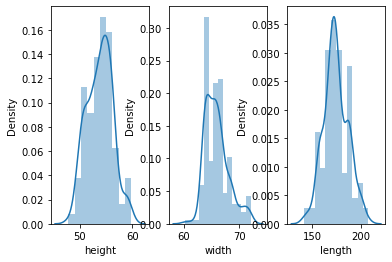

In [27]:
import seaborn as sns
f, (ax) = plt.subplots(1,3)
sns.distplot(df['height'], ax=ax[0])
sns.distplot(df['width'], ax=ax[1])
sns.distplot(df['length'], ax=ax[2])

In [28]:
# Les distributions semblent normales
df['height'] = (df['height']-df['height'].mean())/df['height'].std()
df['width'] = (df['width']-df['width'].mean())/df['width'].std()
df['length'] = (df['length']-df['length'].mean())/df['length'].std()

In [29]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price
count,200.000000,200.000000,200.000000,2.000000e+02,2.000000e+02,2.000000e+02,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.830000,122.000000,98.848000,-1.449507e-14,1.565637e-14,-1.715295e-14,2555.705000,126.860000,3.329981,3.259816,10.170100,103.367228,5118.259901,9.937914,8.041663,13205.690000
std,1.248557,32.076542,6.038261,1.000000e+00,1.000000e+00,1.000000e+00,518.594552,41.650501,0.268562,0.314177,4.014163,37.455570,479.240743,2.539415,1.844764,7966.982558
min,-2.000000,65.000000,86.600000,-2.683052e+00,-2.662033e+00,-2.467213e+00,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,4.795918,4.351852,5118.000000
25%,0.000000,100.250000,94.500000,-6.117210e-01,-8.193430e-01,-7.377137e-01,2163.000000,97.750000,3.150000,3.117500,8.575000,70.000000,4800.000000,7.833333,6.911765,7775.000000
50%,1.000000,122.000000,97.000000,-8.325820e-02,-1.892620e-01,1.270358e-01,2414.000000,119.500000,3.310000,3.290000,9.000000,95.000000,5162.995050,9.791667,7.833333,10270.000000
75%,2.000000,138.250000,102.400000,7.509436e-01,3.694890e-01,7.138301e-01,2928.250000,142.000000,3.582500,3.410000,9.400000,116.000000,5500.000000,12.368421,9.400000,16500.750000
max,3.000000,256.000000,120.900000,2.743309e+00,2.901701e+00,2.474213e+00,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,18.076923,14.687500,45400.000000


<h2 id="binning">Binning</h2>
<b>Qu'est ce donc ?</b>
<p>
Le Binning est un procédé de transformation des valeurs continues en variables discrètes catégoriques  : les bins.
</p>

<b>Exemple: </b>
<p>Dans le jeu de données, la colonne "horsepower" est une valeur réelle allant de 48 à 288, et elle comporte 57 valeurs uniques. On pourrait, par commodité, découper le jeu de données en trois groupes et étudier le prix des véhicuules de puissance faible, moyenne ou forte ? Cela pourrait simplifier l'analyse ? </p>

 Conversion de format :

In [30]:
df["horsepower"]=df["horsepower"].astype(int, copy=True)

Visualisation de la distribution par un histogramme : 

Text(0.5, 1.0, 'horsepower bins')

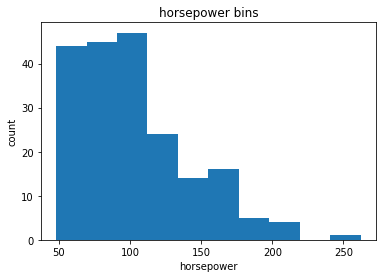

In [31]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# Etiquettes
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

<p>Pour obtenir 4 intervalles découpés de même largeur il suffit de créer un `linspace`entre les valeurs min et max.</p>

In [32]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins #découpe en 4 catégories de 48 a 119 de 119 à 190 etc.. on aurait pu définir nous même les valeurs avec un np.where la on a pris les résultats de l'histogramme, la difficulté aurait été qu'on ne connaissait pas le min et max

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

Nom des groupes:

In [33]:
group_names = ['faible', 'Moyenne', 'Forte']

Application de la fonction `cut`pour associer chaque valeur de a colonne à un groupe. 

In [34]:
df['horsepower-groupe'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-groupe']].head(20)

,horsepower,horsepower-groupe
0,111,faible
1,154,Moyenne
2,102,faible
3,115,faible
4,110,faible
5,110,faible
6,110,faible
7,140,Moyenne
8,101,faible
9,101,faible


Nombre de valeurs dans chaque "bin".

In [35]:
df["horsepower-groupe"].value_counts()

faible     152
Moyenne     43
Forte        5
Name: horsepower-groupe, dtype: int64

Distribution dans chaque bin : 

Text(0.5, 1.0, 'horsepower bins')

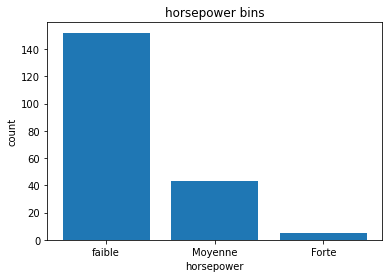

In [36]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-groupe"].value_counts())

# Etiquettes
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

<h2>Variable factice (or dummy variable)</h2>
<p>
Une variable factice est, comme son nom l'indique, une invention totale, une variable numérique permettant de remplacer des catégories. Elle sont appelées 'dummies' car leurs valeur numérique n'a pas de sens en soi. 
</p>

<b>A quoi servent-elles ?</b>
<p>
A utiliser les variables catégoriques dans la regression !
<b>Exemple : </b>
<p>
La colonne "fuel-type" est composée de deux valeurs uniques, "essence" ou "diesel" mais la régression ne comprends que les valeurs numériques.
</p>

<p>
La fonction 'get_dummies' associera une valeur numérique à chaque type de carburant.
</p>

In [37]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-L/100km',
       'highway-L/100km', 'price', 'horsepower-groupe'],
      dtype='object')

In [38]:
df = pd.get_dummies(df, columns=['fuel-type'], drop_first=True)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-groupe,fuel-type_gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,-0.439616,...,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,16500.0,faible,1
1,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,-0.245239,...,2.68,3.47,9.0,154,5000.0,12.368421,9.038462,16500.0,Moyenne,1
2,2,164,audi,std,four,sedan,fwd,front,99.8,0.192109,...,3.19,3.40,10.0,102,5500.0,9.791667,7.833333,13950.0,faible,1
3,2,164,audi,std,four,sedan,4wd,front,99.4,0.192109,...,3.19,3.40,8.0,115,5500.0,13.055556,10.681818,17450.0,faible,1
4,2,122,audi,std,two,sedan,fwd,front,99.8,0.248803,...,3.19,3.40,8.5,110,5500.0,12.368421,9.400000,15250.0,faible,1


In [39]:
# Même travail pour la colonne 'aspiration' 
df = pd.get_dummies(df, columns=['aspiration'], drop_first=True)

Enregistrement du nouveau csv

In [40]:
df.to_csv('clean_df.csv')
df_clean= pd.read_csv('clean_df.csv', index_col=0)
df_clean.head() #les données sont nettoyées il faut absolument les enregistrer sur un nouveau csv pour partir sur un csv clean pour la 2e partie du process

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-groupe,fuel-type_gas,aspiration_turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,-0.439616,-0.855008,...,2.68,9.0,111,5000.0,11.190476,8.703704,16500.0,faible,1,0
1,1,122,alfa-romero,two,hatchback,rwd,front,94.5,-0.245239,-0.189262,...,3.47,9.0,154,5000.0,12.368421,9.038462,16500.0,Moyenne,1,0
2,2,164,audi,four,sedan,fwd,front,99.8,0.192109,0.143611,...,3.40,10.0,102,5500.0,9.791667,7.833333,13950.0,faible,1,0
3,2,164,audi,four,sedan,4wd,front,99.4,0.192109,0.238717,...,3.40,8.0,115,5500.0,13.055556,10.681818,17450.0,faible,1,0
4,2,122,audi,two,sedan,fwd,front,99.8,0.248803,0.191164,...,3.40,8.5,110,5500.0,12.368421,9.400000,15250.0,faible,1,0


<h1>OUF !</h1>

<hr>
Copyright &copy; 2020 Hatem & Driss @NEEDEMAND